170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/10
1563/1563 [==============================] - 68s 42ms/step - loss: 1.5474 - accuracy: 0.4347 - val_loss: 1.2814 - val_accuracy: 0.5453
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1556 - accuracy: 0.5906 - val_loss: 1.1107 - val_accuracy: 0.6062
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0028 - accuracy: 0.6465 - val_loss: 1.0261 - val_accuracy: 0.6452
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9029 - accuracy: 0.6827 - val_loss: 0.9247 - val_accuracy: 0.6768
Epoch 5/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.8336 - accuracy: 0.7077 - val_loss: 0.9019 - val_accuracy: 0.6899
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7707 - accuracy: 0.7284 - val_loss: 0.8711 - val_accuracy: 0.7059
Epoch 7/10
1563/1563 [==============================] - 6

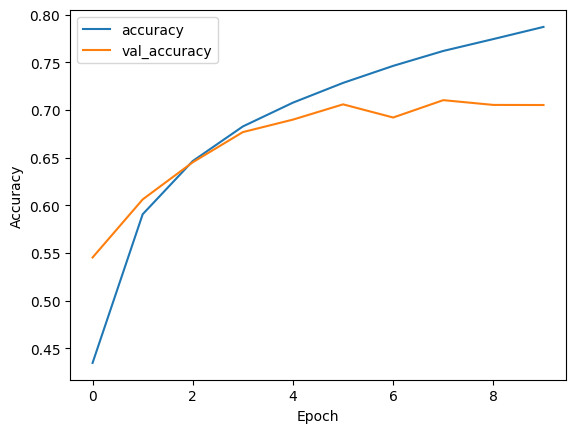

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define ConvNet architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

